In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

%matplotlib inline

In [267]:
#Import data
##################

#Confirmed cases
dfC = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
#Deaths
dfD = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
#Recovered
dfR = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
dfC.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,99,117,129,149,149,197,238,428,566,673


In [305]:
country = "Italy" 
province = "Hubei"
startDate = "1/22/20"

#Example: Extract time series from single location. Returns type = dataframe
dfC.loc[dfC['Country/Region'] == country]

#need to specify Province/State
#dfC.loc[dfC['Country/Region'] == country and dfC['Province/State'] == province]

#Slices further, removing all but the time series. converts to array, resizes to 1D
dfC.loc[dfC['Country/Region'] == country, startDate:].values[0,:]


array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           2,     2,     2,     2,     2,     2,     2,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,    20,    62,   155,   229,   322,   453,
         655,   888,  1128,  1694,  2036,  2502,  3089,  3858,  4636,
        5883,  7375,  9172, 10149, 12462, 12462, 17660, 21157, 24747,
       27980, 31506])

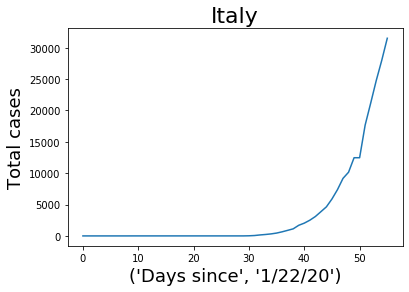

In [306]:
arr = (dfC.loc[dfC['Country/Region'] == country, startDate:].values)[0, :];
days = np.arange((len(arr)))

plt.plot(days, arr)
plt.xlabel(('Days since', startDate), size = 18)
plt.ylabel('Total cases', size = 18)
plt.title(country , size = 22);


Model data with

$e^{b (t - a)}$

where a [dimentions of time] allows an offset from when the outbreak started.
b [1/time] "power" of exponental.

I expect solving $b(t - a) = 1$ will give the time the exponential "turns on". Doesn't seem to...

Covariance matrix =
[[1.01308814e+00 2.99520003e-03]
 [2.99520003e-03 8.87728473e-06]]

Parameters(a, b) =  [-5.49402553  0.17207871]


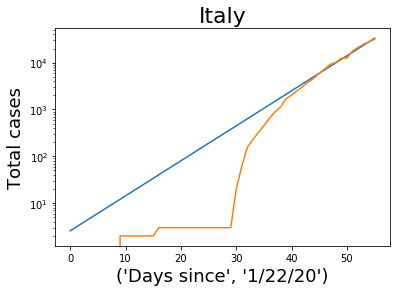

In [307]:
 def func(t, a, b):
    return np.exp(b * (t - a))

popt, pcov = opt.curve_fit(func, days, arr)

plt.semilogy(days, func(days, popt[0], popt[1]))
plt.plot(days, arr)
plt.xlabel(('Days since', startDate), size = 18)
plt.ylabel('Total cases', size = 18)
plt.title(country, size = 22);


print("Covariance matrix =")
print( pcov)
print()
print("Parameters(a, b) = ", popt)
